# `Data Description`

Dataset consists customer information for a customer churn prediction problem. It includes the following columns:

**CustomerID**: Unique identifier for each customer.


**Name**: Name of the customer.


**Age: Age of the customer.**


**Gender**: Gender of the customer (Male or Female).


**Location**: Location where the customer is based, with options including Houston, Los Angeles, Miami, Chicago, and New York.


**Subscription_Length_Months**: The number of months the customer has been subscribed.


**Monthly_Bill**: Monthly bill amount for the customer.


**Total_Usage_GB**: Total usage in gigabytes.


**Churn**: A binary indicator (1 or 0) representing whether the customer has churned (1) or not (0).

In [9]:
pip install openpyxl


     -------------------------------------- 250.9/250.9 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
# importing required libraries

import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_excel(r'C:\Users\DELL\Downloads\Customer_Churn_Prediction_main\Customer_Churn_Prediction_main\customer_churn_large_dataset.xlsx')
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


# `Exploratory Data Analysis (EDA)`

In [3]:
df.sample(8)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
96129,96130,Customer_96130,38,Female,Houston,22,76.74,455,1
67351,67352,Customer_67352,37,Female,Miami,18,70.42,222,1
48848,48849,Customer_48849,69,Male,Chicago,5,54.20,352,0
54284,54285,Customer_54285,24,Female,Houston,15,34.95,188,1
73089,73090,Customer_73090,33,Male,New York,22,82.78,310,1
55966,55967,Customer_55967,35,Female,Chicago,9,37.69,322,1
29215,29216,Customer_29216,22,Male,Chicago,9,77.94,57,0
28751,28752,Customer_28752,25,Male,Los Angeles,5,43.85,215,0


In [7]:
df.shape

(100000, 9)

In [8]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


**All variables has correct data type.**

In [10]:
df.isna().sum()/len(df)*100

CustomerID                    0.0
Name                          0.0
Age                           0.0
Gender                        0.0
Location                      0.0
Subscription_Length_Months    0.0
Monthly_Bill                  0.0
Total_Usage_GB                0.0
Churn                         0.0
dtype: float64

**There is no null value in any of variable.**

In [11]:
df.duplicated().sum()

0

**There is no duplicate record in datset.**

In [12]:
# Statistical summary of numerical variables

df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [13]:
# Statistical summary of categoical variables

df.describe(include=['object'])

,Name,Gender,Location
count,100000,100000,100000
unique,100000,2,5
top,Customer_1,Female,Houston
freq,1,50216,20157


In [14]:
df['Gender'].value_counts()

Gender
Female    50216
Male      49784
Name: count, dtype: int64

In [15]:
df['Location'].value_counts()

Location
Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: count, dtype: int64

In [21]:
# Checking correlation between numerical variables

#df.corr()

df_numeric = df.select_dtypes(include=[np.number])

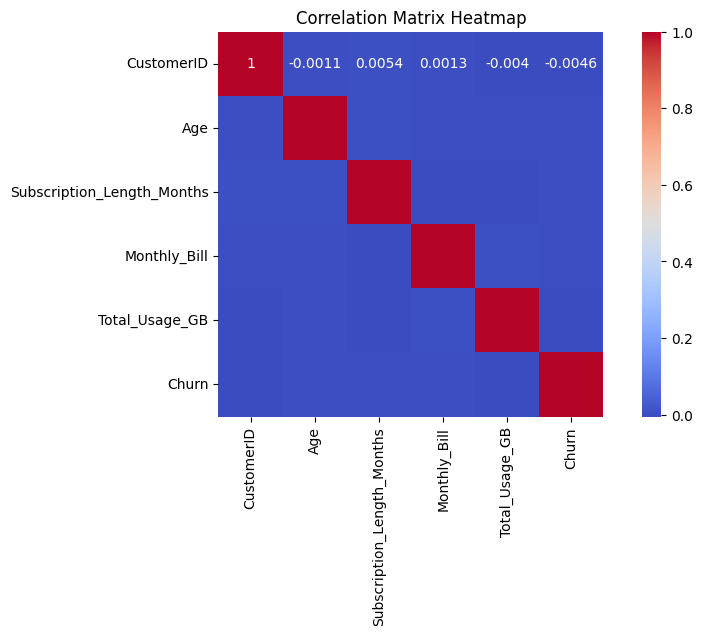

In [22]:
corr_matrix = df_numeric.corr()
plt.figure(figsize=(10,5)) #(width,height)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [23]:
df.drop(columns=['CustomerID', 'Name'],axis=1,inplace=True)

In [24]:
df.columns

Index(['Age', 'Gender', 'Location', 'Subscription_Length_Months',
       'Monthly_Bill', 'Total_Usage_GB', 'Churn'],
      dtype='object')

**Removed ['CustomerID' & 'Name'] variables becuase they are irrelevant for analysis. Now dataset left with 6 variables**

In [25]:
# Check for typo's & suspicious values and rechecking dataset 

for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")
    print()

missing_values = df.isnull().sum()
data_types = df.dtypes

print('-'*50)
print("Missing values:")
print(missing_values)
print()

x = df.duplicated().sum()
print('-'*50)
print("Duplicate values:", x)
print()


y = df.shape
print('-'*50)
print("Shape of Dataset:", y)
print()

z = df.columns
print('-'*50)
print("Columns of Datset:", z)
print()

print('-'*50)
print("\nData types:")
print(data_types)
print()

Unique values in 'Age': [63 62 24 36 46 67 30 20 53 50 44 34 28 42 55 43 31 41 58 64 70 18 25 27
 66 29 60 26 45 19 37 49 38 57 47 48 40 21 33 51 35 69 61 52 39 56 59 65
 22 54 68 32 23]

Unique values in 'Gender': ['Male' 'Female']

Unique values in 'Location': ['Los Angeles' 'New York' 'Miami' 'Chicago' 'Houston']

Unique values in 'Subscription_Length_Months': [17  1  5  3 19 15 10 12 20 13  8 23  2  4 18  9 14 16  6  7 24 22 11 21]

Unique values in 'Monthly_Bill': [73.36 48.76 85.47 ... 75.21 41.98 83.55]

Unique values in 'Total_Usage_GB': [236 172 460 297 266 456 269 396 150 383 442 295 148 239 233 231 198 354
 429 243 270 389 226 393  89 183 135 185 151 115 194 278 423 202 495 162
 101 294 122 305 212 220 253 411 447 218 221 166  64  67 391 232 298 334
 326 459 371 299 376 214 329  50 444 113  76 134 184 319 235  85 332  73
 369 308 446 321  83 114 296 102 215 169 225 140  84 463 402 468 375 366
 404 471 204 320 178 149 361 304 281 177 117 137 322 427 403 237 439 336
 344 288 2

**The dataset has been cleaned and no suspicious values or typos have been found.**

# `Outliers Treatment`

It is important to find and remove unusual or extreme data points, also known as outliers. Outliers can affect the model's understanding of the data and lead to wrong predictions. By identifying and removing outliers, the model becomes more accurate and reliable, and can better capture the actual patterns in the data.

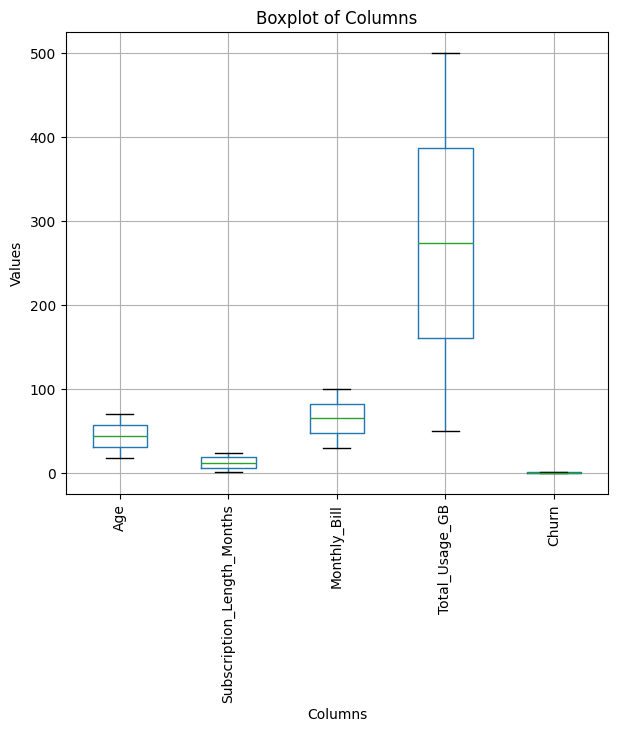

In [26]:
# Adjust figure size based on the number of columns
num_columns = len(df.columns)
fig, ax = plt.subplots(figsize=(10, 6))
if num_columns > 16:
    fig.set_size_inches(10, num_columns * 0.6)
else:
    fig.set_size_inches(num_columns, 6)

# Create a boxplot for each column
df.boxplot(ax=ax)

# Set the title and labels
plt.title("Boxplot of Columns")
plt.xlabel("Columns")
plt.ylabel("Values")

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.show()

**There is no outlier present in any of the variable.**

In [27]:
# Make a copy of cleaned data

df_cleaned = df.copy()

# `Feature Encoding`

Feature encoding techniques converts categorical data (like labels) into numbers that algorithms understand. This is essential because algorithms work with numbers, ensuring valuable info from categories isn't lost.

In [28]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Gender', 'Location'], dtype='object')

**There are two variables, which needs to be encode.**

In [29]:
df = pd.get_dummies(df, columns=['Gender', 'Location'], drop_first = True)

In [30]:
df.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,0,True,False,True,False,False
1,62,1,48.76,172,0,False,False,False,False,True
2,24,5,85.47,460,0,False,False,True,False,False
3,36,3,97.94,297,1,False,False,False,True,False
4,46,19,58.14,266,0,False,False,False,True,False


**Here I apply One Hot Encoding becuase both variables have less number of categories.**

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  int64  
 1   Subscription_Length_Months  100000 non-null  int64  
 2   Monthly_Bill                100000 non-null  float64
 3   Total_Usage_GB              100000 non-null  int64  
 4   Churn                       100000 non-null  int64  
 5   Gender_Male                 100000 non-null  bool   
 6   Location_Houston            100000 non-null  bool   
 7   Location_Los Angeles        100000 non-null  bool   
 8   Location_Miami              100000 non-null  bool   
 9   Location_New York           100000 non-null  bool   
dtypes: bool(5), float64(1), int64(4)
memory usage: 4.3 MB


**Data types of all variables is fine.**

# `Checking Distribution of data`



In [32]:
df.shape

(100000, 10)

In [33]:
# Select appropriate bin size using sturges_rule

import math

def sturges_rule(num_data_points):
    k = 1 + math.log2(num_data_points)
    return int(k)

# Example usage
num_data_points = 100000
bins = sturges_rule(num_data_points)
print("Number of bins according to Sturges' Rule:", bins)

Number of bins according to Sturges' Rule: 17


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


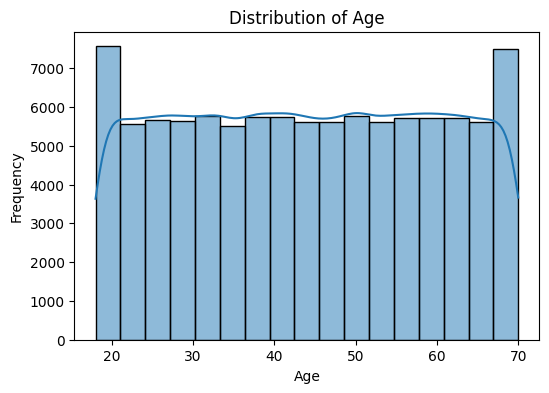

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


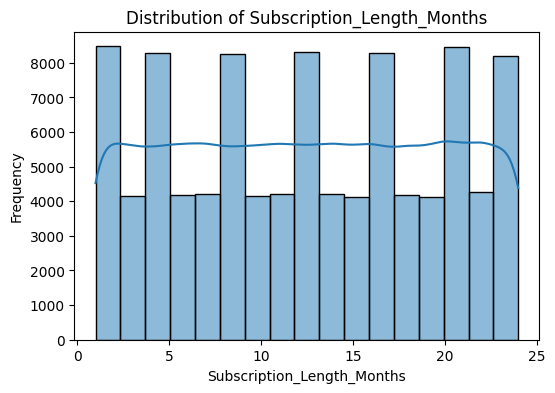

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


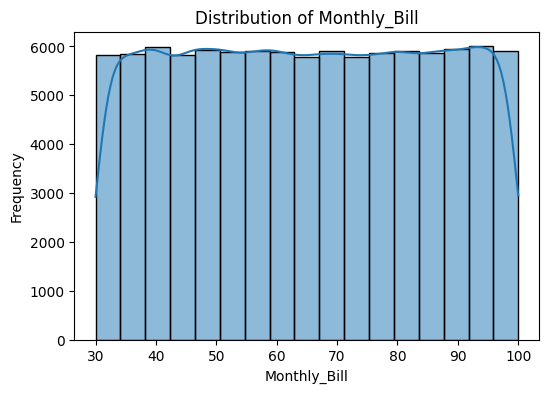

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


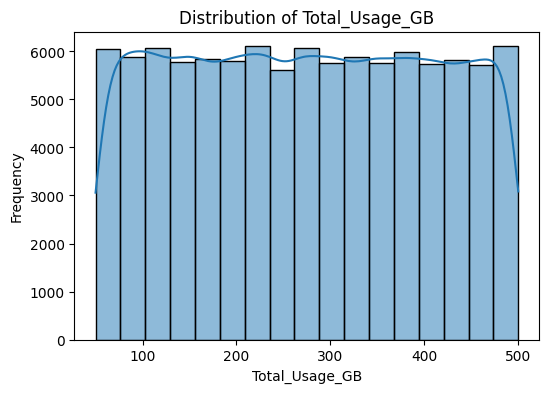

In [36]:
# check distribution of all continuous variables
continuous_vars = df.select_dtypes(include=['float64', 'int64']).columns

# Exclude binary variables from the list
binary_vars = [var for var in continuous_vars if df[var].nunique() == 2]

# Exclude binary variables from the continuous variables
continuous_vars = [var for var in continuous_vars if var not in binary_vars]

# Plot the distribution of each continuous variable
for var in continuous_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=var, bins=17, kde=True)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {var}')
    plt.show()

In [35]:
pip install --upgrade pandas seaborn


     -------------------------------------- 294.9/294.9 kB 9.2 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
Note: you may need to restart the kernel to use updated packages.


In [37]:
# check skewness of all continuous variables
df[continuous_vars].skew()

Age                          -0.002689
Subscription_Length_Months   -0.001655
Monthly_Bill                 -0.000326
Total_Usage_GB                0.007113
dtype: float64

**All variables are approx normally distributed.**

# `Check colinearity between variables`



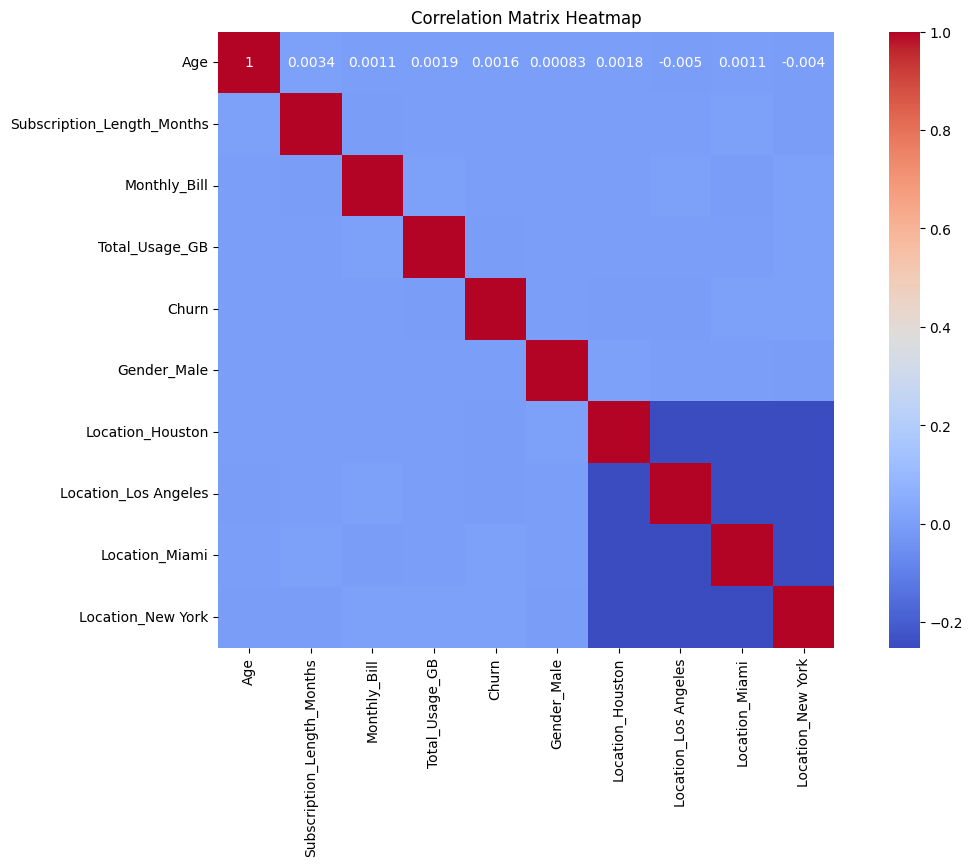

In [38]:
#checking colinearity between variables

corr_matrix = df.corr()

plt.figure(figsize=(14,8)) #(width,height)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

**No pair of variable is highly corrleated.**

# `Diving data into train and test set` 

In [39]:
x = df.drop("Churn",axis=1)
y = df['Churn']

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

**Take 70% data for training and 30% for testing.**

In [41]:
X_train.shape, y_train.shape

((70000, 9), (70000,))

In [42]:
X_test.shape, y_test.shape

((30000, 9), (30000,))

# `Feature Scaling` 



In [43]:
df.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,0,True,False,True,False,False
1,62,1,48.76,172,0,False,False,False,False,True
2,24,5,85.47,460,0,False,False,True,False,False
3,36,3,97.94,297,1,False,False,False,True,False
4,46,19,58.14,266,0,False,False,False,True,False


In [44]:
columns_to_check = df.columns
columns_needs_to_be_scaled = []

for column in columns_to_check:
    if (df[column] > 1).any() or (df[column] < 0).any():
        columns_needs_to_be_scaled.append(column)

print("Columns with values greater than 1 or less than 0:")
print(columns_needs_to_be_scaled)

Columns with values greater than 1 or less than 0:
['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']


**These four columns need scaling, ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']. I decide to use MinMax Scaler becuase majority of variables in binary.**

In [45]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']

scaler = MinMaxScaler()

X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [46]:
X_train.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
76513,0.134615,0.521739,0.973425,0.928889,True,False,True,False,False
60406,0.692308,0.043478,0.598657,0.740000,False,True,False,False,False
27322,0.269231,0.826087,0.509358,0.837778,True,False,False,False,False
53699,0.826923,0.478261,0.760109,0.031111,False,True,False,False,False
65412,1.000000,0.173913,0.170453,0.108889,False,False,False,False,True


In [47]:
X_test.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
75721,0.576923,0.434783,0.835548,0.982222,False,True,False,False,False
80184,0.596154,0.521739,0.151593,0.828889,True,False,False,False,True
19864,0.250000,0.173913,0.043006,0.502222,False,False,True,False,False
76699,0.673077,0.130435,0.923846,0.642222,True,False,False,False,True
92991,0.096154,1.000000,0.745964,0.564444,False,False,True,False,False


# `Check for the class imbalance`




In [48]:
class_counts = df['Churn'].value_counts()
class_counts

Churn
0    50221
1    49779
Name: count, dtype: int64

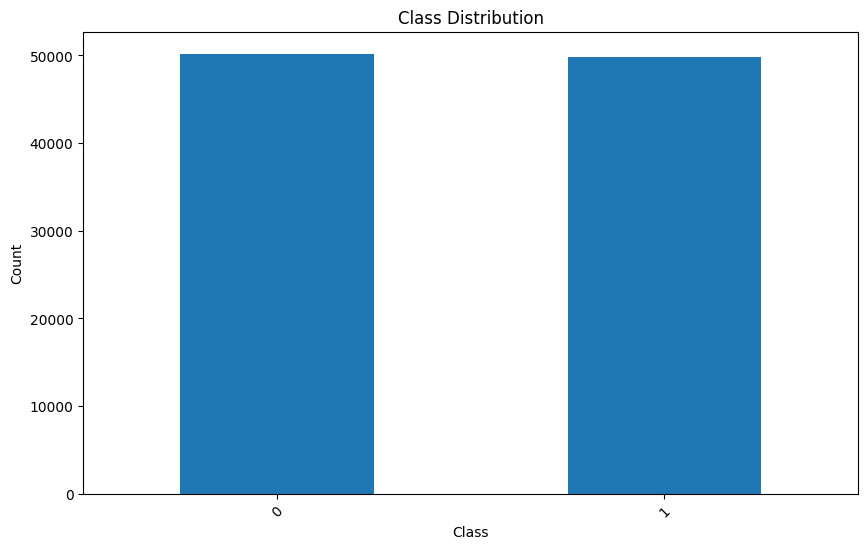

In [49]:
plt.figure(figsize=(10, 6)) 
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**The churn variables are almost evenly distributed, which means that there is no problem of class imbalance.**

# `Feature Selection using Random Forest Feature Importance Method`

In [50]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_jobs=-1, random_state=42)

rf_classifier.fit(X_train, y_train)

importances = rf_classifier.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

feature_importance_df

,Feature,Importance
0,Monthly_Bill,0.316383
1,Total_Usage_GB,0.290353
2,Age,0.194396
3,Subscription_Length_Months,0.142624
4,Gender_Male,0.016683
5,Location_Los Angeles,0.010595
6,Location_Houston,0.010007
7,Location_Miami,0.009792
8,Location_New York,0.009166


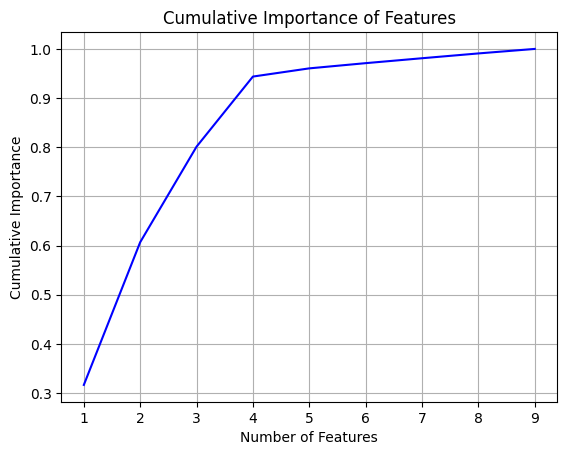

In [51]:
#check optimal number of features

sorted_indices = np.argsort(importances)[::-1]
cumulative_importance = np.cumsum(importances[sorted_indices])

plt.plot(range(1, len(importances) + 1), cumulative_importance, 'b-')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importance of Features')
plt.grid(True)
plt.show()

**The graph shows that only 4 variables are important for the analysis. These variables are:**

* **Monthly bill**


* **Total usage in GB**


* **Age**


* **Subscription length in months**



# `Check multi-colinearity between variables`



In [53]:
print(X_train.dtypes)


Age                           float64
Subscription_Length_Months    float64
Monthly_Bill                  float64
Total_Usage_GB                float64
Gender_Male                      bool
Location_Houston                 bool
Location_Los Angeles             bool
Location_Miami                   bool
Location_New York                bool
dtype: object


In [54]:
X_train = pd.get_dummies(X_train, drop_first=True)


In [55]:
import numpy as np

# Replace inf/-inf with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values or impute them
X_train.dropna(inplace=True)


In [56]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')


In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Variable"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [62]:
print(X_train.head())
#print(X_train.describe())


            Age  Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  \
76513  0.134615                    0.521739      0.973425        0.928889   
60406  0.692308                    0.043478      0.598657        0.740000   
27322  0.269231                    0.826087      0.509358        0.837778   
53699  0.826923                    0.478261      0.760109        0.031111   
65412  1.000000                    0.173913      0.170453        0.108889   

       Gender_Male  Location_Houston  Location_Los Angeles  Location_Miami  \
76513          1.0               0.0                   1.0             0.0   
60406          0.0               1.0                   0.0             0.0   
27322          1.0               0.0                   0.0             0.0   
53699          0.0               1.0                   0.0             0.0   
65412          0.0               0.0                   0.0             0.0   

       Location_New York  
76513                0.0  
60406         

In [61]:
X_train = X_train.astype(float)  # Convert all columns to numeric (float or int)


In [63]:
#checking multicolinearity of X_train_resampled

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Variable"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)

vif

,Variable,VIF
2,Monthly_Bill,3.340229
3,Total_Usage_GB,3.304982
0,Age,3.252427
1,Subscription_Length_Months,3.152641
4,Gender_Male,1.880472
7,Location_Miami,1.729954
5,Location_Houston,1.728491
6,Location_Los Angeles,1.718256
8,Location_New York,1.715994


In [65]:
pip install xgboost


     -------------------------------------- 124.9/124.9 MB 3.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


**The training data does not contain multicollinearity because all of the variables have a VIF value less than 5.**

# `Model Building: Machine Learning Algorithms`

In [66]:
#importing algorithms, metrics and time

import time

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

In [67]:
algorithms = [
    LogisticRegression(n_jobs=-1, random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_jobs=-1),
    GaussianNB(),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(n_jobs=-1, random_state=42),
    XGBClassifier(n_jobs=-1, random_state=42),
    SVC(random_state=42)
]

# Initialize the results dictionary for training data
results_train = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Building Time (s)': []
}

# Apply the algorithms and calculate performance metrics for training data
for algorithm in algorithms:
    start_time = time.time()  # Start timer

    algorithm_name = type(algorithm).__name__
    algorithm.fit(X_train, y_train)
    y_train_pred = algorithm.predict(X_train)

    accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred, average='weighted')
    recall = recall_score(y_train, y_train_pred, average='weighted')
    f1 = f1_score(y_train, y_train_pred, average='weighted')

    end_time = time.time()  # End timer
    building_time = end_time - start_time

    results_train['Algorithm'].append(algorithm_name)
    results_train['Accuracy'].append(accuracy)
    results_train['Precision'].append(precision)
    results_train['Recall'].append(recall)
    results_train['F1-score'].append(f1)
    results_train['Building Time (s)'].append(building_time)

# Create a dataframe for the training data results
df_train = pd.DataFrame(results_train)
df_train

,Algorithm,Accuracy,Precision,Recall,F1-score,Building Time (s)
0,LogisticRegression,0.503214,0.503138,0.503214,0.500180,6.162524
1,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,1.671761
2,KNeighborsClassifier,0.687743,0.687744,0.687743,0.687743,13.901763
3,GaussianNB,0.504471,0.504419,0.504471,0.503437,0.207494
4,AdaBoostClassifier,0.516557,0.516552,0.516557,0.516205,4.172735
5,GradientBoostingClassifier,0.541729,0.541847,0.541729,0.541213,14.303593
6,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,22.748640
7,XGBClassifier,0.671286,0.671308,0.671286,0.671266,1.955154
8,SVC,0.516986,0.517164,0.516986,0.514768,1630.498479


In [68]:
results_test = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

# Apply the algorithms and calculate performance metrics for test data
for algorithm in algorithms:
    algorithm_name = type(algorithm).__name__
    y_test_pred = algorithm.predict(X_test)

    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    results_test['Algorithm'].append(algorithm_name)
    results_test['Accuracy'].append(accuracy)
    results_test['Precision'].append(precision)
    results_test['Recall'].append(recall)
    results_test['F1-score'].append(f1)

# Create a dataframe for the test data results
df_test = pd.DataFrame(results_test)
df_test

,Algorithm,Accuracy,Precision,Recall,F1-score
0,LogisticRegression,0.504733,0.504061,0.504733,0.501456
1,DecisionTreeClassifier,0.499100,0.499157,0.499100,0.499113
2,KNeighborsClassifier,0.496500,0.496527,0.496500,0.496510
3,GaussianNB,0.505267,0.504866,0.505267,0.504104
4,AdaBoostClassifier,0.504200,0.504030,0.504200,0.503962
5,GradientBoostingClassifier,0.499567,0.499291,0.499567,0.499067
6,RandomForestClassifier,0.497267,0.497076,0.497267,0.497004
7,XGBClassifier,0.497367,0.497303,0.497367,0.497315
8,SVC,0.500933,0.500248,0.500933,0.498261


In [ ]:
X_train = X_train[['Monthly_Bill', 'Total_Usage_GB', 'Age', 'Subscription_Length_Months']]

X_test = X_test[['Monthly_Bill', 'Total_Usage_GB', 'Age', 'Subscription_Length_Months']]

In [ ]:
print('X_train columns:', X_train.columns)
print('-'*120)
print('X_test columns:', X_test.columns)

In [ ]:
algorithms = [
    LogisticRegression(n_jobs=-1, random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_jobs=-1),
    GaussianNB(),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(n_jobs=-1, random_state=42),
    XGBClassifier(n_jobs=-1, random_state=42),
    SVC(random_state=42)
]

# Initialize the results dictionary for training data
results_train = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Building Time (s)': []
}

# Apply the algorithms and calculate performance metrics for training data
for algorithm in algorithms:
    start_time = time.time()  # Start timer

    algorithm_name = type(algorithm).__name__
    algorithm.fit(X_train, y_train)
    y_train_pred = algorithm.predict(X_train)

    accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred, average='weighted')
    recall = recall_score(y_train, y_train_pred, average='weighted')
    f1 = f1_score(y_train, y_train_pred, average='weighted')

    end_time = time.time()  # End timer
    building_time = end_time - start_time

    results_train['Algorithm'].append(algorithm_name)
    results_train['Accuracy'].append(accuracy)
    results_train['Precision'].append(precision)
    results_train['Recall'].append(recall)
    results_train['F1-score'].append(f1)
    results_train['Building Time (s)'].append(building_time)

# Create a dataframe for the training data results
df_train = pd.DataFrame(results_train)
df_train

In [ ]:
results_test = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

# Apply the algorithms and calculate performance metrics for test data
for algorithm in algorithms:
    algorithm_name = type(algorithm).__name__
    y_test_pred = algorithm.predict(X_test)

    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    results_test['Algorithm'].append(algorithm_name)
    results_test['Accuracy'].append(accuracy)
    results_test['Precision'].append(precision)
    results_test['Recall'].append(recall)
    results_test['F1-score'].append(f1)

# Create a dataframe for the test data results
df_test = pd.DataFrame(results_test)
df_test

# `Model Building: Neural Network`

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import recall_score

In [ ]:
# Define the EarlyStopping and ModelCheckpoint callbacks

early_stopping = EarlyStopping(
    monitor='val_loss',        # The metric to monitor. This is usually the validation loss.
    min_delta=0.001,           # The minimum amount of improvement required to consider the model to have improved.
    patience=10,               # The number of epochs to wait without improvement before stopping the training.
    verbose=1,                 # Print output
    mode='auto',               # Consider mode of the metric as min or max.
    restore_best_weights=True  # Whether to restore the model weights at the epoch with the best validation loss.
)

In [44]:
checkpoint = ModelCheckpoint('ChurnClassifier.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

NameError: name 'ModelCheckpoint' is not defined

## `Build Neural Network Architectures & Fit Model on Training Data`

### `Architecture I`

In [45]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model]
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

NameError: name 'tf' is not defined

In [46]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.3, callbacks=[early_stopping, checkpoint],
                    verbose=1)

NameError: name 'model' is not defined

### `Architecture II`

In [47]:
model = Sequential()

# layers
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compile the model]
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

NameError: name 'Sequential' is not defined

In [48]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.3, callbacks=[early_stopping, checkpoint],
                    verbose=1)

NameError: name 'model' is not defined

### `Architecture III`

In [49]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
from keras.optimizers import SGD

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

NameError: name 'Sequential' is not defined

In [50]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.3, callbacks=[early_stopping, checkpoint],
                    verbose=1)

NameError: name 'model' is not defined

### `Architecture IV`

In [51]:
model = Sequential()

# Input layer with BatchNormalization and Activation (ReLU)
model.add(Dense(10, input_dim=4, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# First hidden layer with BatchNormalization, Activation (ReLU), and Dropout
model.add(Dense(10, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))  # 20% dropout

# Second hidden layer with BatchNormalization, Activation (ReLU), and Dropout
model.add(Dense(5, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))  # 10% dropout

# Output layer with Sigmoid activation
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

NameError: name 'Sequential' is not defined

In [52]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.3, callbacks=[early_stopping, checkpoint],
                    verbose=1)

NameError: name 'model' is not defined

### `Architecture V`

In [53]:
# Build the neural network
model = Sequential([
    Dense(64, activation = 'relu', input_dim = 4),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

NameError: name 'Sequential' is not defined

In [54]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2, callbacks=[early_stopping, checkpoint],
                    verbose=1)

NameError: name 'model' is not defined

* **I have tried multiple ANN architectures, but none of them have provided good results.**

## `Ensembles of Random Forest`

In [55]:
# Initialize base estimator (Random Forest)
base_estimator = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize models
adaboost_model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)
gradient_boost_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
xgboost_model = XGBClassifier(n_estimators=50, random_state=42)

# Initialize lists to store metrics
models = ['AdaBoost', 'Gradient Boosting', 'XGBoost']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Building Time']
results_train = {metric: [] for metric in metrics}
results_test = {metric: [] for metric in metrics}

# Train and evaluate models
for model in [adaboost_model, gradient_boost_model, xgboost_model]:
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()

    # Predict on the training set
    y_train_pred = model.predict(X_train)

    # Calculate metrics on training data
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred, average='weighted')
    recall_train = recall_score(y_train, y_train_pred, average='weighted')
    f1_train = f1_score(y_train, y_train_pred, average='weighted')
    building_time = end_time - start_time

    # Predict on the test set
    y_test_pred = model.predict(X_test)

    # Calculate metrics on test data
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred, average='weighted')
    recall_test = recall_score(y_test, y_test_pred, average='weighted')
    f1_test = f1_score(y_test, y_test_pred, average='weighted')

    # Append metrics to the results dictionaries
    results_train['Accuracy'].append(accuracy_train)
    results_train['Precision'].append(precision_train)
    results_train['Recall'].append(recall_train)
    results_train['F1 Score'].append(f1_train)
    results_train['Building Time'].append(building_time)

    results_test['Accuracy'].append(accuracy_test)
    results_test['Precision'].append(precision_test)
    results_test['Recall'].append(recall_test)
    results_test['F1 Score'].append(f1_test)
    results_test['Building Time'].append(building_time)

# Create DataFrames from the results
results_train_df = pd.DataFrame(results_train, index=models)
results_test_df = pd.DataFrame(results_test, index=models)

# Display the DataFrames
print("Training Data Results:")
results_train_df

NameError: name 'AdaBoostClassifier' is not defined

In [56]:
print("\nTest Data Results:")
results_test_df


Test Data Results:


NameError: name 'results_test_df' is not defined

# `Model Building: PCA`

In [57]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['Gender', 'Location'], drop_first = True)

In [58]:
x = df_cleaned.drop('Churn', axis=1)
y = df_cleaned['Churn']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [61]:
# Convert scaled numpy arrays back to DataFrames

X_train = pd.DataFrame(X_train)

X_test = pd.DataFrame(X_test)

In [62]:
X_train.head()

,0,1,2,3,4,5,6,7,8
0,-1.243589,0.074501,1.632642,1.481066,1.005731,-0.502610,1.998751,-0.502499,-0.498169
1,0.654284,-1.515230,0.336478,0.829765,-0.994302,1.989613,-0.500312,-0.502499,-0.498169
2,-0.785482,1.086147,0.027632,1.166909,1.005731,-0.502610,-0.500312,-0.502499,-0.498169
3,1.112391,-0.070020,0.894871,-1.614532,-0.994302,1.989613,-0.500312,-0.502499,-0.498169
4,1.701386,-1.081667,-1.144499,-1.346349,-0.994302,-0.502610,-0.500312,-0.502499,2.007351


In [63]:
X_test.head()

,0,1,2,3,4,5,6,7,8
0,0.261620,-0.214541,1.155784,1.664963,-0.994302,1.989613,-0.500312,-0.502499,-0.498169
1,0.327064,0.074501,-1.209728,1.136259,1.005731,-0.502610,-0.500312,-0.502499,2.007351
2,-0.850926,-1.081667,-1.585284,0.009891,-0.994302,-0.502610,1.998751,-0.502499,-0.498169
3,0.588840,-1.226188,1.461171,0.492620,1.005731,-0.502610,-0.500312,-0.502499,2.007351
4,-1.374477,1.664231,0.845950,0.224437,-0.994302,-0.502610,1.998751,-0.502499,-0.498169


In [64]:
from sklearn.decomposition import PCA

pca = PCA()

X_train_pca = pca.fit_transform(X_train)

In [65]:
X_train_pca.shape

(70000, 9)

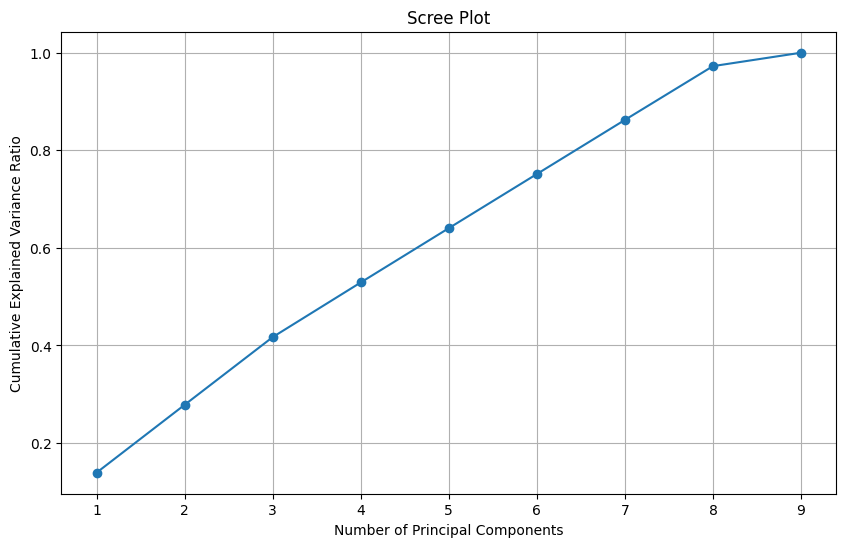

In [66]:
# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid()
plt.show()

**8 out of 9 principal components (PCs) capture approximately 98% of the variance of the data. Therefore, I will select 8 PCs for further analysis.**

In [77]:
pca = PCA(n_components=8)  # Select 8 principal components

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [78]:
X_train_pca.shape, X_test_pca.shape

((70000, 8), (30000, 8))

In [75]:
algorithms = [
    LogisticRegression(n_jobs=-1, random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_jobs=-1),
    GaussianNB(),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(n_jobs=-1, random_state=42),
    XGBClassifier(n_jobs=-1, random_state=42),
    SVC(random_state=42)
]

# Initialize the results dictionary for training data
results_train = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Building Time (s)': []
}

# Apply the algorithms and calculate performance metrics for training data using X_train_pca
for algorithm in algorithms:
    start_time = time.time()  # Start timer

    algorithm_name = type(algorithm).__name__
    algorithm.fit(X_train_pca, y_train)
    y_train_pred = algorithm.predict(X_train_pca)

    accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred, average='weighted')
    recall = recall_score(y_train, y_train_pred, average='weighted')
    f1 = f1_score(y_train, y_train_pred, average='weighted')

    end_time = time.time()  # End timer
    building_time = end_time - start_time

    results_train['Algorithm'].append(algorithm_name)
    results_train['Accuracy'].append(accuracy)
    results_train['Precision'].append(precision)
    results_train['Recall'].append(recall)
    results_train['F1-score'].append(f1)
    results_train['Building Time (s)'].append(building_time)

# Create a DataFrame for the training data results
df_train = pd.DataFrame(results_train)
df_train

NameError: name 'LogisticRegression' is not defined

In [76]:
results_test = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

# Apply the algorithms and calculate performance metrics for test data using X_test_pca
for algorithm in algorithms:
    algorithm_name = type(algorithm).__name__
    y_test_pred = algorithm.predict(X_test_pca)

    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    results_test['Algorithm'].append(algorithm_name)
    results_test['Accuracy'].append(accuracy)
    results_test['Precision'].append(precision)
    results_test['Recall'].append(recall)
    results_test['F1-score'].append(f1)

# Create a DataFrame for the test data results
df_test = pd.DataFrame(results_test)
df_test

NameError: name 'algorithms' is not defined

**There's no significant improvement in performance with PCA.**

# `Final Model: XGBoost Using 9 variables`

In [79]:
x = df_cleaned.drop("Churn",axis=1)
y = df_cleaned['Churn']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [87]:
X_train.shape, X_test.shape

((70000, 9), (30000, 9))

In [88]:
X_train.columns

Index(['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Gender_Male', 'Location_Houston', 'Location_Los Angeles',
       'Location_Miami', 'Location_New York'],
      dtype='object')

In [89]:
columns_to_scale = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']

scaler = MinMaxScaler()

X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [90]:
# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(
    objective='binary:logistic',  # For binary classification
    random_state=42               # Random seed for reproducibility
)

# Train (fit) the model
xgb_classifier.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [91]:
y_train_pred = xgb_classifier.predict(X_train)
y_test_pred = xgb_classifier.predict(X_test)

# Calculate metrics for train set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Calculate metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Train': [train_accuracy, train_precision, train_recall, train_f1],
    'Test': [test_accuracy, test_precision, test_recall, test_f1]
})

results

,Metric,Train,Test
0,Accuracy,0.664929,0.500500
1,Precision,0.668665,0.495329
2,Recall,0.651227,0.489224
3,F1-Score,0.659831,0.492258


# `Hyperparameter Tunning`



In [92]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 150]
}

In [94]:
# Initialize GridSearchCV with recall as the scoring metric
grid_search = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid,
    scoring='recall',
    cv=5
)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

**According to the problem statement, false negatives are more important to reduce. Therefore, I selected recall as a metric to focus on.**

In [95]:
# Get the best model from the search
best_xgb = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_test_pred = best_xgb.predict(X_test)

# Calculate recall for the test set
test_recall = recall_score(y_test, y_test_pred)

print("Best Parameters:", grid_search.best_params_)
print("Test Recall with Best Model:", test_recall)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
Test Recall with Best Model: 0.46619073275862066


**After hyperparameter tuning, the performance of the model did not improve. Hence, I choose XGBoost CLassifier without hyperparameter tunning and perform cross-validation on it.**

# `Cross Validation`



In [96]:
#cross validation of accuracy

from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_classifier, X_train, y_train, cv=5, scoring='accuracy',n_jobs=-1)

print("Cross-Validation Scores (Accuracy):", scores)
print()
print("Mean Accuracy Score:", scores.mean())

Cross-Validation Scores (Accuracy): [0.49692857 0.50057143 0.49892857 0.50478571 0.505     ]

Mean Accuracy Score: 0.5012428571428571


In [97]:
#cross validation of recall

scores = cross_val_score(xgb_classifier, X_train, y_train, cv=5, scoring='recall',n_jobs=-1)

print("Cross-Validation Scores (Recall):", scores)
print()
print("Mean Recall Score:", scores.mean())

Cross-Validation Scores (Recall): [0.48990983 0.49398798 0.48869167 0.50171772 0.49427426]

Mean Recall Score: 0.4937162923036775


# `Finding Optimal Threshold`

In [98]:
#creating a dataframe of probabilites, actual labels, predicted labels for genral check

probabilities = xgb_classifier.predict_proba(X_train)

predicted_labels = xgb_classifier.predict(X_train)

results = pd.DataFrame({'Probability': probabilities[:, 1],
                        'Actual_Label': y_train,
                        'Predicted_Label': predicted_labels})

results.sample(10)

,Probability,Actual_Label,Predicted_Label
43364,0.474755,1,0
52617,0.490060,1,0
83194,0.420003,0,0
79395,0.481040,0,0
78962,0.469605,0,0
32846,0.477571,0,0
88132,0.498932,1,0
22788,0.528793,0,1
63261,0.456429,0,0
48217,0.518680,0,1


In [99]:
#check evaulation metrics for different thresholds

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Creating an empty DataFrame to store the evaluation metrics
metrics_df = pd.DataFrame(columns=['Probability', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Iterating over the probability thresholds
for threshold in thresholds:
    # Converting probabilities to predicted labels based on the threshold
    predicted_labels = (probabilities[:, 1] >= threshold).astype(int)

    # Calculating evaluation metrics
    accuracy = accuracy_score(y_train, predicted_labels)
    precision = precision_score(y_train, predicted_labels, zero_division=1)
    recall = recall_score(y_train, predicted_labels, zero_division=1)
    f1 = f1_score(y_train, predicted_labels, zero_division=1)

    # Adding the metrics to the DataFrame
    metrics_df = pd.concat([metrics_df, pd.DataFrame({'Probability': [threshold],
                                                      'Accuracy': [accuracy],
                                                      'Precision': [precision],
                                                      'Recall': [recall],
                                                      'F1 Score': [f1]})], ignore_index=True)
metrics_df

,Probability,Accuracy,Precision,Recall,F1 Score
0,0.1,0.499214,0.499114,1.000000,0.665879
1,0.2,0.501929,0.500473,1.000000,0.667087
2,0.3,0.514757,0.506998,0.999714,0.672793
3,0.4,0.569243,0.537409,0.982508,0.694786
4,0.5,0.664929,0.668665,0.651227,0.659831
5,0.6,0.569614,0.888422,0.157281,0.267250
6,0.7,0.517100,0.986207,0.032750,0.063395
7,0.8,0.504286,1.000000,0.006613,0.013139
8,0.9,0.501371,1.000000,0.000773,0.001545
9,1.0,0.500986,1.000000,0.000000,0.000000


## `Check the Trade-Off Between Accuracy, Sensitivity, Specitivity, F-1 Score and Probabilities (Thresholds)`

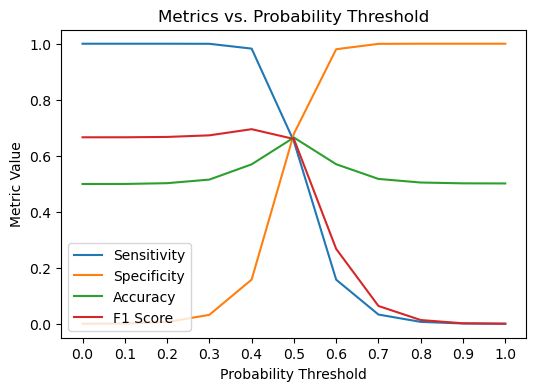

In [100]:
from sklearn.metrics import confusion_matrix

# Calculate predicted probabilities for the train data
train_probabilities = xgb_classifier.predict_proba(X_train)[:, 1]

# Apply different thresholds to obtain binary predictions for train data
thresholds = np.arange(0, 1.1, 0.1)
sensitivity = []
specificity = []
accuracy = []
f1_scores = []

for threshold in thresholds:
    train_predictions = (train_probabilities >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_train, train_predictions).ravel()
    sensitivity.append(tp / (tp + fn))
    specificity.append(tn / (tn + fp))
    accuracy.append((tp + tn) / (tp + tn + fp + fn))
    f1_scores.append(f1_score(y_train, train_predictions))

# Plot the sensitivity, specificity, accuracy, and F1 score against probability thresholds
plt.figure(figsize=(6,4))
plt.plot(thresholds, sensitivity, label='Sensitivity')
plt.plot(thresholds, specificity, label='Specificity')
plt.plot(thresholds, accuracy, label='Accuracy')
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.xlabel('Probability Threshold')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.ylabel('Metric Value')
plt.title('Metrics vs. Probability Threshold')
plt.legend(loc='lower left')
plt.show()

**The graph indicates that 0.5 is the best threshold point, where accuracy, sensitivity, specificity, and F1 score are all stable.**

# `Model Evaulation (XG Boost)`

## `Train & Test Data Metrics`

In [101]:
# Calculate evaluation metrics for train data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='macro')
train_recall = recall_score(y_train, y_train_pred, average='macro')
train_f1_score = f1_score(y_train, y_train_pred, average='macro')

# Predict on the test data
y_test_pred = xgb_classifier.predict(X_test)

# Calculate evaluation metrics for test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')
test_f1_score = f1_score(y_test, y_test_pred, average='macro')

# Create a DataFrame to store the evaluation metrics
metrics_data = {
    'Dataset': ['Train', 'Test'],
    'Accuracy': [train_accuracy, test_accuracy],
    'Precision': [train_precision, test_precision],
    'Recall': [train_recall, test_recall],
    'F1-score': [train_f1_score, test_f1_score]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df

,Dataset,Accuracy,Precision,Recall,F1-score
0,Train,0.664929,0.665030,0.664902,0.664853
1,Test,0.500500,0.500387,0.500387,0.500368


## `Confusion Matrix`



In [102]:
from sklearn.metrics import confusion_matrix

# Calculate predictions for the training set using a threshold of 0.50
train_predictions = (xgb_classifier.predict_proba(X_train)[:, 1] >= 0.50).astype(int)
train_confusion_matrix = confusion_matrix(y_train, train_predictions)

# Calculate predictions for the test set using a threshold of 0.50
test_predictions = (xgb_classifier.predict_proba(X_test)[:, 1] >= 0.50).astype(int)
test_confusion_matrix = confusion_matrix(y_test, test_predictions)

# Calculate the total number of samples in each set
train_total = len(y_train)
test_total = len(y_test)

# Calculate the confusion matrix in percentage form for the training set
train_confusion_matrix_percent = train_confusion_matrix / train_total * 100

# Calculate the confusion matrix in percentage form for the test set
test_confusion_matrix_percent = test_confusion_matrix / test_total * 100

# Create a dataframe for the confusion matrix
confusion_matrix_df = pd.DataFrame({'Training Set': train_confusion_matrix_percent.flatten(),
                                    'Test Set': test_confusion_matrix_percent.flatten()},
                                   index=['True Positive (%)', 'True Negative (%)', 'False Positive (%)', 'False Negative (%)', ])
#
confusion_matrix_df

,Training Set,Test Set
True Positive (%),33.995714,25.836667
True Negative (%),16.102857,24.670000
False Positive (%),17.404286,25.280000
False Negative (%),32.497143,24.213333


## `ROC-AUC Curve`

ROC-AUC curve, or Receiver Operating Characteristic-Area Under Curve, is a graph used in machine learning to measure the performance of a binary classifier. It plots the true positive rate (TPR) against the false positive rate (FPR) at different classification thresholds.

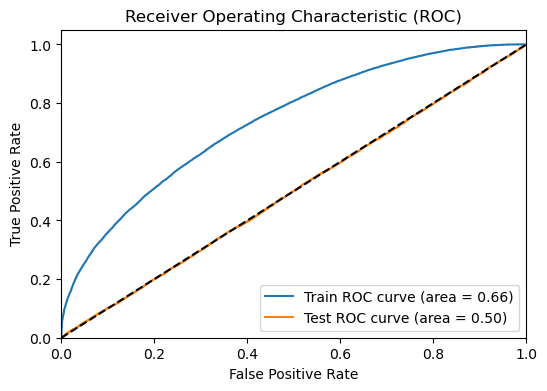

In [103]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Calculate predicted probabilities for the train data
train_probabilities = xgb_classifier.predict_proba(X_train)[:, 1]

# Apply the threshold of 0.50 to obtain binary predictions for train data
train_predictions = (train_probabilities >= 0.50).astype(int)

# Calculate the false positive rate, true positive rate, and thresholds for train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_probabilities)

# Calculate the ROC-AUC score for train data
roc_auc_train = roc_auc_score(y_train, train_predictions)

# Calculate predicted probabilities for the test data
test_probabilities = xgb_classifier.predict_proba(X_test)[:, 1]

# Apply the threshold of 0.50 to obtain binary predictions for test data
test_predictions = (test_probabilities >= 0.50).astype(int)

# Calculate the false positive rate, true positive rate, and thresholds for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_probabilities)

# Calculate the ROC-AUC score for test data
roc_auc_test = roc_auc_score(y_test, test_predictions)

# Plot the ROC curves
plt.figure(figsize=(6,4))
plt.plot(fpr_train, tpr_train, label='Train ROC curve (area = {:.2f})'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = {:.2f})'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# `Important Features in Model Building`

In [104]:
feature_importance_df

,Feature,Importance
0,Monthly_Bill,0.316383
1,Total_Usage_GB,0.290353
2,Age,0.194396
3,Subscription_Length_Months,0.142624
4,Gender_Male,0.016683
5,Location_Los Angeles,0.010595
6,Location_Houston,0.010007
7,Location_Miami,0.009792
8,Location_New York,0.009166


# `Save model in a pickle file`

In [106]:
import joblib


joblib.dump(xgb_classifier, 'customer_churn_classifier.pkl')

['customer_churn_classifier.pkl']

# `Outcome`

**The outcome of this customer churn prediction project involves developing a machine learning model to predict whether customers are likely to churn or not. This prediction is based on various customer attributes such as age, gender, location, subscription length, monthly bill, and total usage. The model's primary purpose is to assist in identifying customers who are at a higher risk of churning, enabling the business to take proactive measures to retain them. By using the trained model to predict churn, the company can allocate resources more effectively, personalize engagement strategies, and implement targeted retention efforts. Ultimately, the project's success is measured by the model's ability to make predictions, helping the company reduce churn rates, improve customer satisfaction, and optimize its customer retention strategies.**